In [153]:
## PART 1 : Install Dependencies & Run Spark Session
#install pyspark
! pip install pyspark

In [154]:
#create a sparksession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("spark").getOrCreate()

In [155]:
#create spark dataframe
file_path = "BSdiabetes_prediction_dataset.csv"
df_diabetes_data = spark.read.csv(file_path, header=True,inferSchema=True)

In [156]:
#display the dataframe
df_diabetes_data.show()

+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender| age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|Female|80.0|           0|            1|          never|25.19|        6.6|                140|       0|
|Female|54.0|           0|            0|        No Info|27.32|        6.6|                 80|       0|
|  Male|28.0|           0|            0|          never|27.32|        5.7|                158|       0|
|Female|36.0|           0|            0|        current|23.45|        5.0|                155|       0|
|  Male|76.0|           1|            1|        current|20.14|        4.8|                155|       0|
|Female|20.0|           0|            0|          never|27.32|        6.6|                 85|       0|
|Female|44.0|           0|            0|          never|19.31|  

In [157]:
#show amount of rows
df_diabetes_data.count()

100000

In [158]:
#print the schema
df_diabetes_data.printSchema()

root
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- smoking_history: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- HbA1c_level: double (nullable = true)
 |-- blood_glucose_level: integer (nullable = true)
 |-- diabetes: integer (nullable = true)



In [159]:
#count the total no. of diabetic and non-diabetic class (values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes)
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('diabetes').count().show()

(100000, 9)
+--------+-----+
|diabetes|count|
+--------+-----+
|       1| 8500|
|       0|91500|
+--------+-----+



In [160]:
#count the total no. of gender types
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('gender').count().show()

(100000, 9)
+------+-----+
|gender|count|
+------+-----+
|Female|58552|
| Other|   18|
|  Male|41430|
+------+-----+



In [161]:
#check to see if there are any empty values in the 'gender' column
df_diabetes_data[df_diabetes_data['gender'] == '']

DataFrame[gender: string, age: double, hypertension: int, heart_disease: int, smoking_history: string, bmi: double, HbA1c_level: double, blood_glucose_level: int, diabetes: int]

In [162]:
#get the summary statistics
df_diabetes_data.describe().show()

+-------+------+-----------------+------------------+------------------+---------------+-----------------+------------------+-------------------+-------------------+
|summary|gender|              age|      hypertension|     heart_disease|smoking_history|              bmi|       HbA1c_level|blood_glucose_level|           diabetes|
+-------+------+-----------------+------------------+------------------+---------------+-----------------+------------------+-------------------+-------------------+
|  count|100000|           100000|            100000|            100000|         100000|           100000|            100000|             100000|             100000|
|   mean|  NULL|41.88585600000013|           0.07485|           0.03942|           NULL|27.32076709999422|5.5275069999983275|          138.05806|              0.085|
| stddev|  NULL|22.51683987161704|0.2631504702289171|0.1945930169980986|           NULL|6.636783416648357|1.0706720918835468|  40.70813604870383|0.27888308976661896|
|   

In [163]:
## Data Cleaning & Preparation
#check for null values
for col in df_diabetes_data.columns:
  print(col + ":", df_diabetes_data[df_diabetes_data[col].isNull()].count())

gender: 0
age: 0
hypertension: 0
heart_disease: 0
smoking_history: 0
bmi: 0
HbA1c_level: 0
blood_glucose_level: 0
diabetes: 0


In [164]:
#look for the unnecessary values present
def count_zeros():
  columns_list = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
  for i in columns_list:
    print(i+":",df_diabetes_data[df_diabetes_data[i]==0].count())
    count_zeros()

In [165]:
#display the dataframe
df_diabetes_data.show()

+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender| age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|Female|80.0|           0|            1|          never|25.19|        6.6|                140|       0|
|Female|54.0|           0|            0|        No Info|27.32|        6.6|                 80|       0|
|  Male|28.0|           0|            0|          never|27.32|        5.7|                158|       0|
|Female|36.0|           0|            0|        current|23.45|        5.0|                155|       0|
|  Male|76.0|           1|            1|        current|20.14|        4.8|                155|       0|
|Female|20.0|           0|            0|          never|27.32|        6.6|                 85|       0|
|Female|44.0|           0|            0|          never|19.31|  

In [166]:
#drop the 'other' rows in the gender columns
string_to_remove = "Other"
df_diabetes_data = df_diabetes_data[df_diabetes_data['Gender'] != string_to_remove]

In [167]:
#count the total no. of gender types
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('gender').count().show()

(99982, 9)
+------+-----+
|gender|count|
+------+-----+
|Female|58552|
|  Male|41430|
+------+-----+



In [168]:
#count the total no. of smoker/non-smoker types
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('smoking_history').count().show()

(99982, 9)
+---------------+-----+
|smoking_history|count|
+---------------+-----+
|    not current| 6439|
|         former| 9352|
|        No Info|35810|
|        current| 9286|
|          never|35092|
|           ever| 4003|
+---------------+-----+



In [169]:
#drop the 'other' rows in the gender columns
string_to_remove_1= "No Info"
df_diabetes_data = df_diabetes_data[df_diabetes_data['smoking_history'] != string_to_remove_1]

In [170]:
#count the total no. of smoker/non-smoker types
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('smoking_history').count().show()

(64172, 9)
+---------------+-----+
|smoking_history|count|
+---------------+-----+
|    not current| 6439|
|         former| 9352|
|        current| 9286|
|          never|35092|
|           ever| 4003|
+---------------+-----+



In [171]:
#count the total no. of gender types
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('gender').count().show()

(64172, 9)
+------+-----+
|gender|count|
+------+-----+
|Female|38852|
|  Male|25320|
+------+-----+



In [172]:
#assign in the 'gender'column 'Female' = 0, and 'Male' = 1
from pyspark.sql.functions import when, col
df_diabetes_data = df_diabetes_data.withColumn("gender",
    when(col("gender") == "Female", 0).
    when(col("gender") == "Male", 1).
    otherwise(col("gender"))
)
df_diabetes_data.show()

+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender| age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|     0|80.0|           0|            1|          never|25.19|        6.6|                140|       0|
|     1|28.0|           0|            0|          never|27.32|        5.7|                158|       0|
|     0|36.0|           0|            0|        current|23.45|        5.0|                155|       0|
|     1|76.0|           1|            1|        current|20.14|        4.8|                155|       0|
|     0|20.0|           0|            0|          never|27.32|        6.6|                 85|       0|
|     0|44.0|           0|            0|          never|19.31|        6.5|                200|       1|
|     1|42.0|           0|            0|          never|33.64|  

In [173]:
#assign in the 'smoking_history': "never" = 0, "ever" = 1, "not current" = 2, "current" = 3, "former" = 4
from pyspark.sql.functions import when, col
df_diabetes_data = df_diabetes_data.withColumn("smoking_history",
    when(col("smoking_history") == "never", 0).
    when(col("smoking_history") == "ever", 1).
    when(col("smoking_history") == "not current", 2).
    when(col("smoking_history") == "current", 3).
    when(col("smoking_history") == "former", 4).
    when(col("smoking_history") == "No Info", 5).
    otherwise(col("smoking_history")).cast('int')
)
df_diabetes_data.show()



+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender| age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|     0|80.0|           0|            1|              0|25.19|        6.6|                140|       0|
|     1|28.0|           0|            0|              0|27.32|        5.7|                158|       0|
|     0|36.0|           0|            0|              3|23.45|        5.0|                155|       0|
|     1|76.0|           1|            1|              3|20.14|        4.8|                155|       0|
|     0|20.0|           0|            0|              0|27.32|        6.6|                 85|       0|
|     0|44.0|           0|            0|              0|19.31|        6.5|                200|       1|
|     1|42.0|           0|            0|              0|33.64|  

In [211]:
from pyspark.sql.functions import col

# Convert 'age' column to integer data type
df_diabetes_data = df_diabetes_data.withColumn("age", col("age").cast('int'))

# Show the DataFrame to verify the changes
df_diabetes_data.show()

+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender|age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|   0.0| 80|           0|            1|            0.0|25.19|        6.6|                140|       0|
|   1.0| 28|           0|            0|            0.0|27.32|        5.7|                158|       0|
|   0.0| 36|           0|            0|            3.0|23.45|        5.0|                155|       0|
|   1.0| 76|           1|            1|            3.0|20.14|        4.8|                155|       0|
|   0.0| 20|           0|            0|            0.0|27.32|        6.6|                 85|       0|
|   0.0| 44|           0|            0|            0.0|19.31|        6.5|                200|       1|
|   1.0| 42|           0|            0|            0.0|33.64|        4.8|

In [208]:
df_diabetes_data.dtypes

[('gender', 'float'),
 ('age', 'double'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('smoking_history', 'float'),
 ('bmi', 'double'),
 ('HbA1c_level', 'double'),
 ('blood_glucose_level', 'int'),
 ('diabetes', 'int')]

In [212]:
# gender and smoking_history needs to be converted to float data type for model to work
df_diabetes_data = df_diabetes_data.withColumn("gender", col("gender").cast('float'))
df_diabetes_data = df_diabetes_data.withColumn("smoking_history", col("smoking_history").cast('float'))
df_diabetes_data.show()

+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender|age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|   0.0| 80|           0|            1|            0.0|25.19|        6.6|                140|       0|
|   1.0| 28|           0|            0|            0.0|27.32|        5.7|                158|       0|
|   0.0| 36|           0|            0|            3.0|23.45|        5.0|                155|       0|
|   1.0| 76|           1|            1|            3.0|20.14|        4.8|                155|       0|
|   0.0| 20|           0|            0|            0.0|27.32|        6.6|                 85|       0|
|   0.0| 44|           0|            0|            0.0|19.31|        6.5|                200|       1|
|   1.0| 42|           0|            0|            0.0|33.64|        4.8|

In [213]:
from pyspark.sql.functions import col

# Convert 'gender' and 'smoking_history' columns to float data type
df_diabetes_data = df_diabetes_data.withColumn("gender", col("gender").cast('float'))
df_diabetes_data = df_diabetes_data.withColumn("smoking_history", col("smoking_history").cast('float'))

# Show the DataFrame to verify the changes
df_diabetes_data.show()

+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender|age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|   0.0| 80|           0|            1|            0.0|25.19|        6.6|                140|       0|
|   1.0| 28|           0|            0|            0.0|27.32|        5.7|                158|       0|
|   0.0| 36|           0|            0|            3.0|23.45|        5.0|                155|       0|
|   1.0| 76|           1|            1|            3.0|20.14|        4.8|                155|       0|
|   0.0| 20|           0|            0|            0.0|27.32|        6.6|                 85|       0|
|   0.0| 44|           0|            0|            0.0|19.31|        6.5|                200|       1|
|   1.0| 42|           0|            0|            0.0|33.64|        4.8|

In [214]:
##PART 4: Correlation Analysis & Feature Selection
#find the correlation among the set of input & output variables
for i in df_diabetes_data.columns:
  print("Correlation to outcome for {} is {}".format(i, df_diabetes_data.stat.corr("diabetes",i)))

Correlation to outcome for gender is 0.05699689368565596
Correlation to outcome for age is 0.26083296824208985
Correlation to outcome for hypertension is 0.19222574901207254
Correlation to outcome for heart_disease is 0.16961397731730365
Correlation to outcome for smoking_history is 0.06472564826560573
Correlation to outcome for bmi is 0.20442115545137657
Correlation to outcome for HbA1c_level is 0.43889709468177335
Correlation to outcome for blood_glucose_level is 0.449697968864106
Correlation to outcome for diabetes is 1.0


In [215]:
# #feature selection
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = ['gender', 'age', 'hypertension', 'heart_disease',
                                         'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'], outputCol='features')
output_data = assembler.transform(df_diabetes_data)

In [216]:
## PART 5: Split Dataset & Build the Model
#create final data
from pyspark.ml.classification import LogisticRegression

final_data = output_data.select('features','diabetes')

In [217]:
#print schema of final data
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- diabetes: integer (nullable = true)



In [218]:
#split the dataset ; build the model
train, test = final_data.randomSplit([0.7, 0.3])
models = LogisticRegression(labelCol= 'diabetes')
model = models.fit(train)

In [219]:
#summary of the model
summary = model.summary
summary.predictions.describe().show()

+-------+-------------------+-------------------+
|summary|           diabetes|         prediction|
+-------+-------------------+-------------------+
|  count|              44952|              44952|
|   mean|0.11022868837871508|0.08179836269798897|
| stddev|0.31317807479322185| 0.2740603244368564|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



In [220]:
## PART 6: Evaluate and Save the Model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = model.evaluate(test)

In [221]:
predictions.predictions.show(10)

+--------------------+--------+--------------------+--------------------+----------+
|            features|diabetes|       rawPrediction|         probability|prediction|
+--------------------+--------+--------------------+--------------------+----------+
|(8,[0,5,6,7],[1.0...|       0|[6.98566357093458...|[0.99907580566816...|       0.0|
|(8,[0,5,6,7],[1.0...|       0|[10.1108312806235...|[0.99995936463928...|       0.0|
|(8,[0,5,6,7],[1.0...|       0|[11.5752733082265...|[0.99999060452815...|       0.0|
|(8,[0,5,6,7],[1.0...|       0|[9.10108188085734...|[0.99988846737619...|       0.0|
|(8,[1,5,6,7],[1.0...|       0|[5.10728233415103...|[0.99398390319122...|       0.0|
|(8,[1,5,6,7],[1.0...|       0|[11.7724340001360...|[0.99999228575327...|       0.0|
|(8,[1,5,6,7],[1.0...|       0|[5.88755937961597...|[0.99723393425761...|       0.0|
|(8,[1,5,6,7],[1.0...|       0|[6.14438154141742...|[0.99785909093945...|       0.0|
|(8,[1,5,6,7],[1.0...|       0|[8.39384673314678...|[0.9997737959

In [222]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol= 'rawPrediction', labelCol='diabetes')
evaluator.evaluate(model.transform(test))

0.9572813287105805

In [225]:
# save model
# model.save("model")

In [188]:
# load saved model back to the environment
from pyspark.ml.classification import LogisticRegressionModel

model = LogisticRegressionModel.load('model')

In [196]:
# ## PART 7: Prediction on New Data with the saved model
# # Create a new spark dataframe
# test_df = spark.read.csv('C:\\path\\to\\beauty_diabetes_prediction_dataset.csv', header=True, inferSchema=True)



In [198]:
# #print the schema
# test_df.printSchema()

In [ ]:
#create an additional feature merged column
test_data = assembler.transform(test_df)

In [ ]:
#print the schema
test_data.printSchema()

In [ ]:
#use model to make predictions
results = model.transform(test_data)
results.printSchema()

In [ ]:
#display the predictions
results.select('features','prediction').show()

In [ ]:
#display the predictions
results.select('features','prediction').show()

In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [236]:
# Convert PySpark DataFrame to Pandas DataFrame
df_diabetes_pd = df_diabetes_data.toPandas()

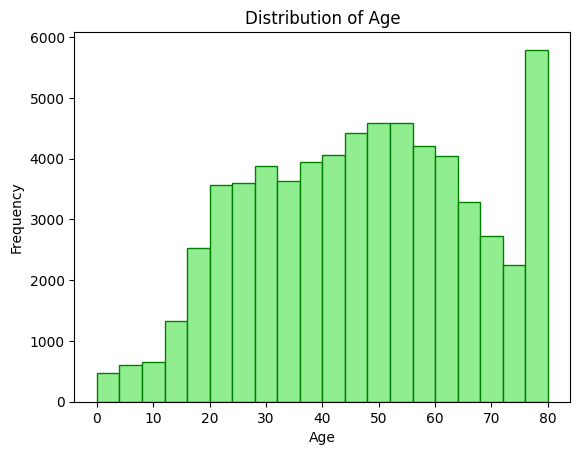

In [256]:
# Histogram of Age
plt.hist(df_diabetes_pd['age'], bins=20, color='lightgreen', edgecolor='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

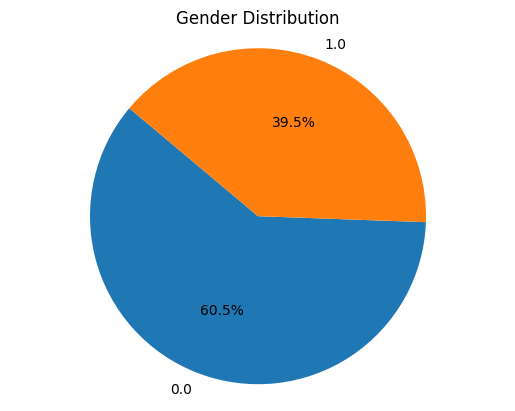

In [259]:
# Pie Chart of Gender Distribution
gender_counts = df_diabetes_pd['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

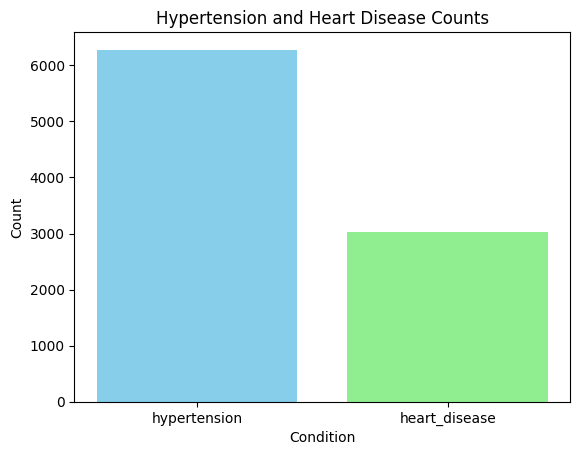

In [260]:
# Bar Chart of Hypertension and Heart Disease
condition_counts = df_diabetes_pd[['hypertension', 'heart_disease']].sum()
conditions = condition_counts.index
plt.bar(conditions, condition_counts, color=['skyblue', 'lightgreen'])
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Hypertension and Heart Disease Counts')
plt.show()

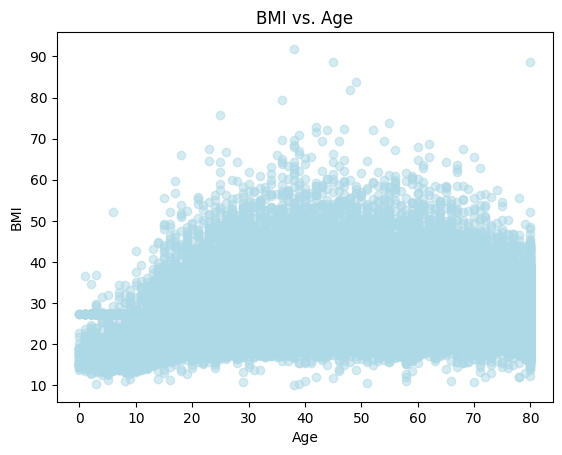

In [264]:
# Scatter Plot of BMI vs. Age
plt.scatter(df_diabetes_pd['age'], df_diabetes_pd['bmi'], color='lightblue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI vs. Age')
plt.show()

<ipython-input-261-c257e5e2248d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='blood_glucose_level', data=df_diabetes_pd, palette='Set2')


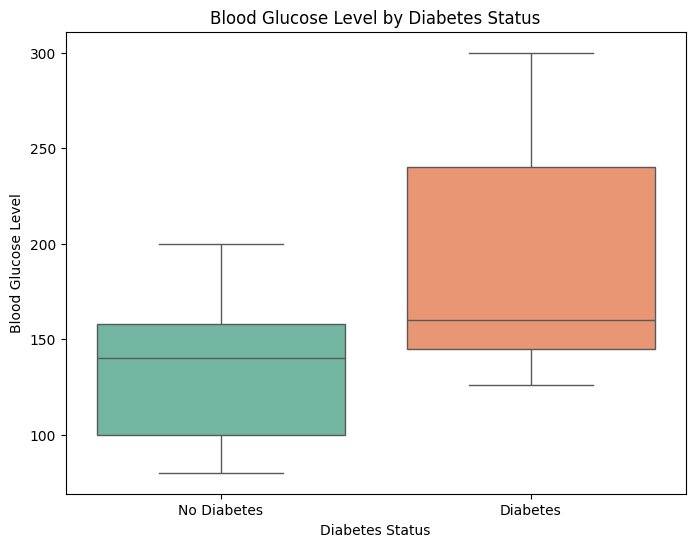

In [261]:
# Boxplot of Blood Glucose Level by Diabetes Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df_diabetes_pd, palette='Set2')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level by Diabetes Status')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()